C:/Users/24581/flowers/Training
(240, 320, 3)


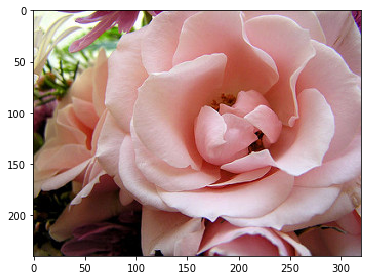

In [1]:
train_root  = "C:/Users/24581/flowers/Training"
test_root = "C:/Users/24581/flowers/Test"
print(train_root)

from skimage import io
image = io.imread("C:/Users/24581/flowers/Test/rose/12240303_80d87f77a3_n.jpg")
print(image.shape)
io.imshow(image)


In [2]:
batch_size = 3


In [3]:
from keras.preprocessing.image import ImageDataGenerator

Generator = ImageDataGenerator()
train_data = Generator.flow_from_directory(train_root, (100, 100), batch_size=batch_size)
test_data = Generator.flow_from_directory(test_root, (100, 100), batch_size=batch_size)


ModuleNotFoundError: No module named 'tensorflow'

In [4]:
import tensorflow as tf
from matplotlib.pyplot import imshow
import os

im = train_data[0][0][1]
img = tf.keras.preprocessing.image.array_to_img(im)
imshow(img)

num_classes = len([i for i in os.listdir(train_root)])
print(num_classes)


ModuleNotFoundError: No module named 'tensorflow'

In [5]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(48, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(48, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(num_classes, activation="softmax"))
model.summary()


ModuleNotFoundError: No module named 'tensorflow'

In [6]:
#remove optimizer if needed
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.fit(train_data, batch_size = batch_size, epochs=15)


Epoch 1/15
5/9 [===============>..............] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

UnknownError: Graph execution error:

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000001FF2415F0E0>
Traceback (most recent call last):

  File "E:\anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 270, in __call__
    ret = func(*args)

  File "E:\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "E:\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1030, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "E:\anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 831, in wrapped_generator
    for data in generator_fn():

  File "E:\anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 957, in generator_fn
    yield x[i]

  File "E:\anaconda3\lib\site-packages\keras\preprocessing\image.py", line 110, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "E:\anaconda3\lib\site-packages\keras\preprocessing\image.py", line 337, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "E:\anaconda3\lib\site-packages\keras\utils\image_utils.py", line 394, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "E:\anaconda3\lib\site-packages\PIL\Image.py", line 3008, in open
    raise UnidentifiedImageError(

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000001FF2415F0E0>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_1302]

In [7]:
# score = model.evaluate(train_data)
# print(score)
score = model.evaluate(test_data)
print(score)


1439/1439 [==============================] - 11s 7ms/step - loss: 1.6094 - accuracy: 0.2000
[1.6094200611114502, 0.19999754428863525]
